<a href="https://colab.research.google.com/github/KevinFallon/fastai/blob/main/fastai_chapter1_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -Uqq fastai
!pip install -U duckduckgo_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 96 kB 5.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def find_images(search_term, max_results):
  search_results = list(ddg_images(keywords=search_term,
                                   max_results=max_results))
  image_links = []
  for res in search_results:
    image_links.append(res.get('image'))
  return image_links


https://brobible.com/wp-content/uploads/2017/03/shutterstock_354718355.jpg


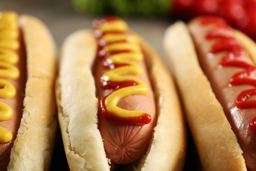

In [5]:
from fastai.vision.utils import download_url
from fastai.vision.all import *

dest = 'hotdog.jpg'
url = find_images('hotdog photos', 1)[0]
print(url)
download_url(url, dest, show_progress=False)
img = Image.open(dest)
img.to_thumb(256, 256)

In [6]:
import os

image_types = ['hotdog', 'hamburger']
dir_name = 'images'

def dl_images(subject_name):
  urls = find_images(f"{subject_name} photos", max_results=10)
  dest = f"{dir_name}/{subject_name}"
  download_images(dest, urls=urls)


if not os.path.exists(dir_name):
  os.mkdir(dir_name)
for it in image_types:
  dl_images(it)

Found 20 items
2 datasets of sizes 16,4
Setting up Pipeline: PILBase.create
Setting up Pipeline: is_hotdog -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'size': (128, 128), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}


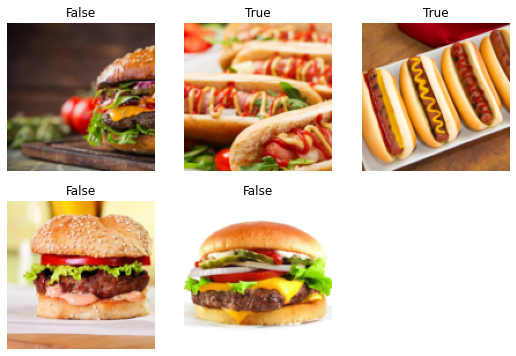

In [7]:
import re
regex = 'images\/hotdog\/.*'

def is_hotdog(fname):
  return bool(re.match(regex, str(fname)))

db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=is_hotdog,
    item_tfms=Resize(128)
)

# print(db)

# print(os.listdir(dir_name + "/hotdog/"))
# print("get image files:")
# print(get_image_files(dir_name + "/hotdog"))

dls = db.dataloaders(dir_name, verbose=True, bs=5)
dls.show_batch(max_n=5)

In [8]:
learner = vision_learner(dls, resnet34, metrics=error_rate)
learner.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.022326,2.145488,0.750000,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.454399,1.073811,0.500000,00:02
1,0.327757,0.148496,0.000000,00:02
2,0.387739,0.202507,0.250000,00:02


In [15]:
dest = 'hamburger_test.jpg'
url = find_images('hamburger photos', 1)[0]
print(url)
download_url(url, dest, show_progress=False)

is_hotdog,idx,probs = learner.predict(PILImage.create('hotdog.jpg'))
print(probs)
print(f"This is a hotdog: {is_hotdog}")
print(f"probability its a hotdog: {probs[idx]}")

is_hotdog,idx,probs = learner.predict(PILImage.create('hamburger_test.jpg'))
print(probs)
print(f"This is a hotdog: {is_hotdog}")
print(f"probability its a hamburger: {probs[idx]}")

https://cmx.weightwatchers.com/assets-proxy/weight-watchers/image/upload/v1594406683/visitor-site/prod/ca/burgers_mobile_my18jv


TensorBase([4.9732e-05, 9.9995e-01])
This is a hotdog: True
probability its a hotdog: 0.9999502897262573


TensorBase([9.9914e-01, 8.6067e-04])
This is a hotdog: False
probability its a hamburger: 0.9991393089294434
